In [1]:
# Data Handling
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Text Preprocessing
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter

# convert text data into numerical features for machine learning algorithms
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Data Splitting to train the model
from sklearn.model_selection import train_test_split

# Machine Learning Algorithms
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

# Save the model
import joblib

# Data Cleaning
# EDA
# Model Building
# Evaluation
# Improvement


In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


1. Data Cleaning : Handled 'v1' and 'v2' column renaming and removed null/duplicate entries to ensure data integrity

In [3]:
# get info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [5]:
# Rename column names
df.rename(columns={'v1':'target', 'v2' : 'text'}, inplace=True)

In [6]:
# Encode target column to 0 and 1
df['target'] = df['target'].map({'ham' : 0, 'spam' : 1})

In [7]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

np.int64(403)

In [10]:
# remove duplicate values
df = df.drop_duplicates(keep='first')

In [11]:
df.shape

(5169, 2)

2. EDA

In [12]:
# get the count of ham and spam 
a = df['target'].value_counts()

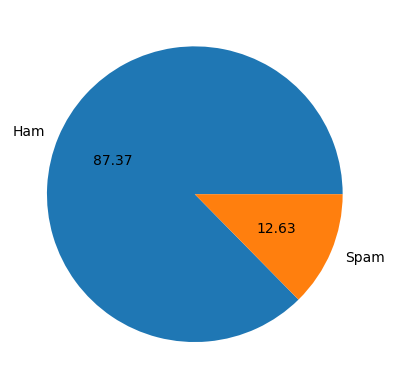

In [13]:
# Data Imbalance visualisation using Pie Chart
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [14]:
# data is imbalanced

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# calculate total no. of characters, words and sentences in each SMS

# num_characters
df['num_characters'] = df['text'].apply(len)

In [17]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
# num_words
# df['text'].apply(lambda x: nltk.word_tokenize(x))
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
# num_sentences
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
# ham describe
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# spam describe
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


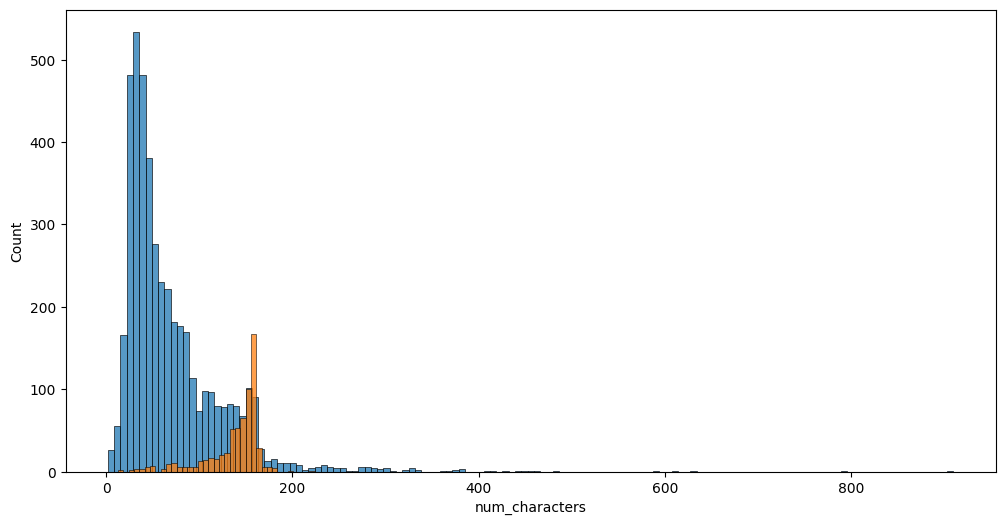

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])
plt.show()

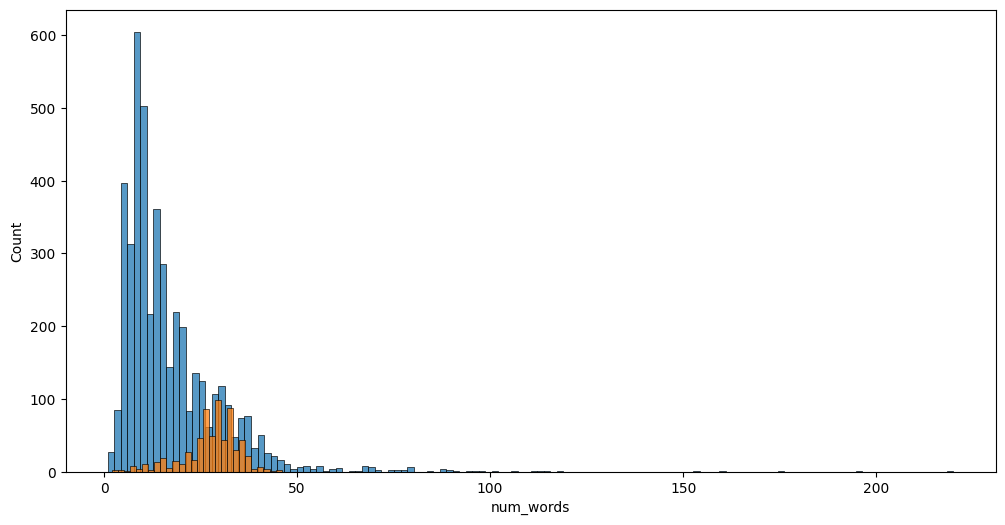

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])
plt.show()

<Figure size 1000x600 with 0 Axes>

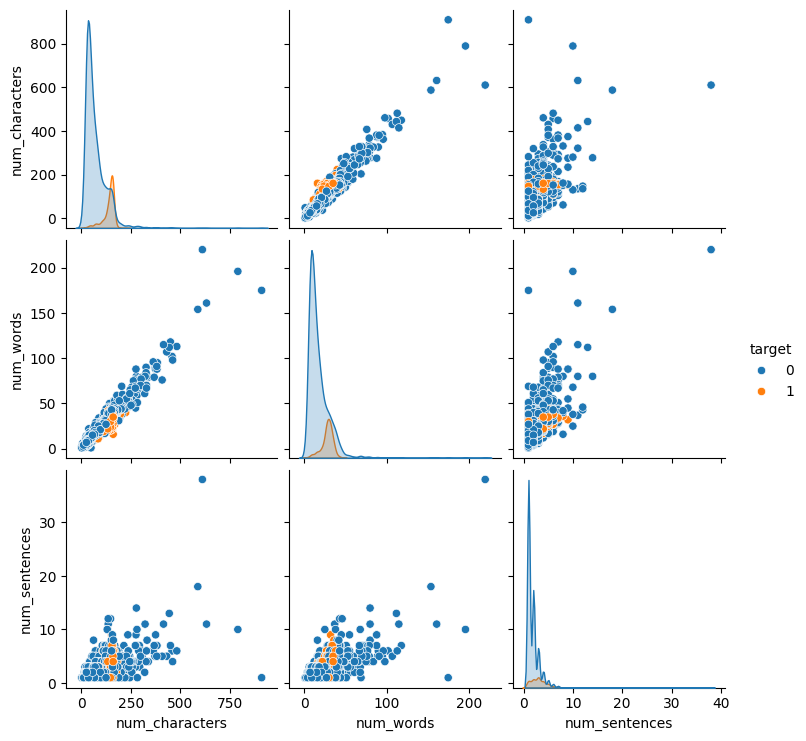

In [26]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df, hue='target')
plt.show()

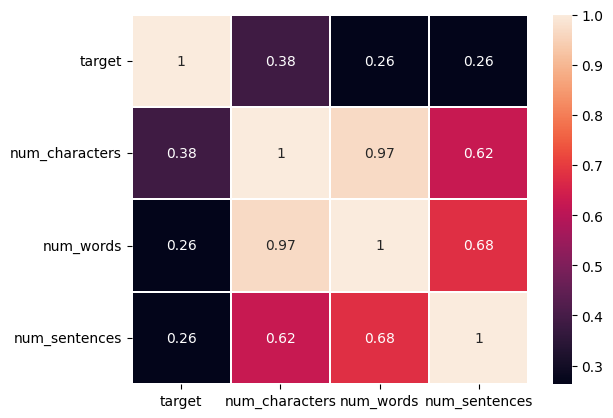

In [27]:
df_new = df.drop(columns=['text'])
sns.heatmap(df_new.corr(), linewidths=0.2, annot=True)
plt.show()

3. Data Preprocessing : Implemented a standard NLP pipeline: Tokenization, removing special characters, and stemming to reduce feature dimensionality.

- Lower case
- Tokenization(breaking the sentence into words or tokens)
- Removing special characters(@, #, $, %)
- Removing stop words and punctuations(stop words - 'is', 'of', 'at'         punctuations - ' , ! ? )
- Stemming('dance', 'dancing' --> will be treated as one eg.'dance')

In [28]:
def text_transform(text):
    # to lower the text
    text = text.lower()

    # tokenize the text
    text = nltk.tokenize.word_tokenize(text)

    # Removing special characters
    t = []
    for i in text:
        if i.isalnum():
            t.append(i)

    text = t.copy()
    t.clear()

    # removing stop words and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            t.append(i)
    
    text = t.copy()
    t.clear()

    # stemming the words
    obj = PorterStemmer()
    for i in text:
        t.append(obj.stem(i))

    # return as a string
    return " ".join(t)


In [29]:
df['text_transformed'] =  df['text'].apply(text_transform)

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Get the top words used in ham and spam

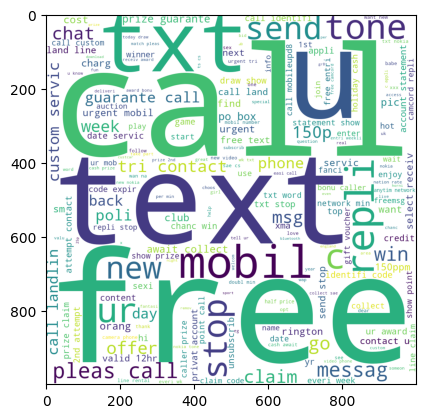

In [31]:
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')
spam_wc =  wc.generate(df[df['target'] == 1]['text_transformed'].str.cat(sep=" "))
plt.Figure(figsize=(18,18))
plt.imshow(spam_wc)

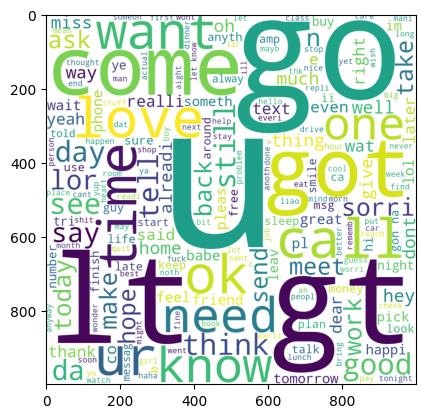

In [32]:
ham_wc =  wc.generate(df[df['target'] == 0]['text_transformed'].str.cat(sep=" "))
plt.Figure(figsize=(18,18))
plt.imshow(ham_wc)

In [33]:
spam_words = []
for msg in df[df['target'] == 1]['text_transformed'].tolist():
    for word in msg.split():
        spam_words.append(word)

len(spam_words)

9939

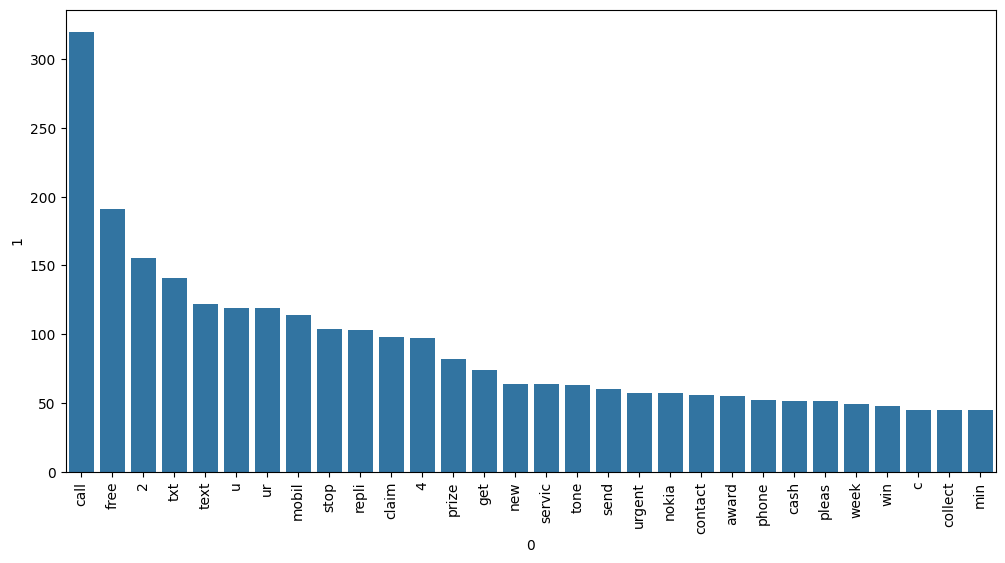

In [34]:
spam_words_name = pd.DataFrame(Counter(spam_words).most_common(30))[0]
spam_words_count = pd.DataFrame(Counter(spam_words).most_common(30))[1]
plt.figure(figsize=(12,6))
sns.barplot(x=spam_words_name, y=spam_words_count)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
ham_words = []
for msg in df[df['target'] == 0]['text_transformed'].tolist():
    for word in msg.split():
        ham_words.append(word)

len(ham_words)

35404

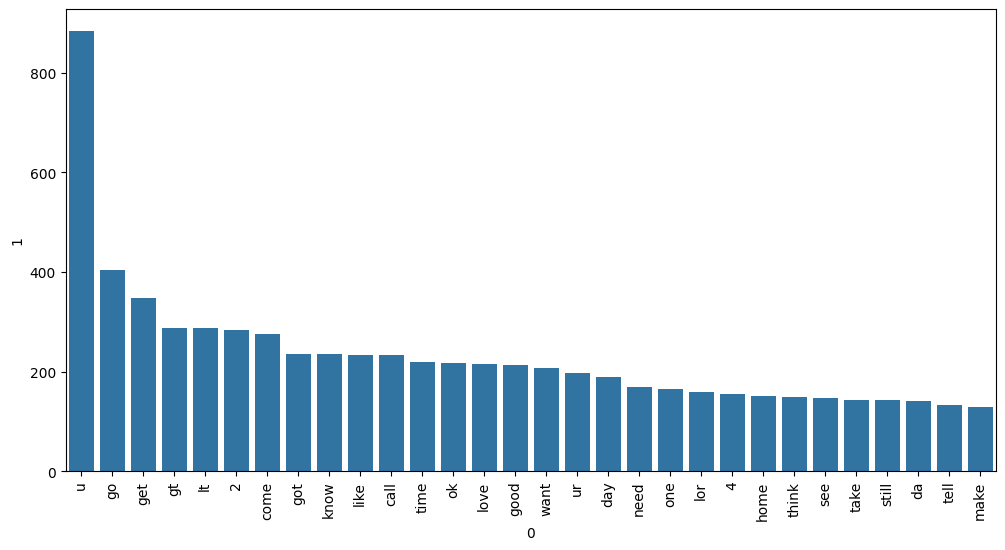

In [36]:
ham_words_name = pd.DataFrame(Counter(ham_words).most_common(30))[0]
ham_words_count = pd.DataFrame(Counter(ham_words).most_common(30))[1]
plt.figure(figsize=(12,6))
sns.barplot(x=ham_words_name, y=ham_words_count)
plt.xticks(rotation='vertical')
plt.show()

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,text_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Vectorization : 
Utilized TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical vectors, prioritizing rare but meaningful words.

In [38]:
tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(df['text_transformed'])

X = matrix.toarray()
Y = df['target'].values

In [39]:
X.shape

(5169, 6708)

In [40]:
Y.shape

(5169,)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

4. Model Building


In [42]:
# Using Multiple Naive Bayes Algorithm
bnf = BernoulliNB()
mnf = MultinomialNB()
gnf = GaussianNB()

In [43]:
bnf.fit(X_train, Y_train)
Y_pred_bnf = bnf.predict(X_test)
print(accuracy_score(Y_pred_bnf, Y_test))
print(precision_score(Y_pred_bnf, Y_test))
print(confusion_matrix(Y_pred_bnf, Y_test))
print(classification_report(Y_pred_bnf, Y_test))


0.9661508704061895
0.7862068965517242
[[885  31]
 [  4 114]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       916
           1       0.79      0.97      0.87       118

    accuracy                           0.97      1034
   macro avg       0.89      0.97      0.92      1034
weighted avg       0.97      0.97      0.97      1034



In [44]:
mnf.fit(X_train, Y_train)
Y_pred_mnf = mnf.predict(X_test)
print(accuracy_score(Y_pred_mnf, Y_test))
print(precision_score(Y_pred_mnf, Y_test))
print(confusion_matrix(Y_pred_mnf, Y_test))
print(classification_report(Y_pred_mnf, Y_test))

0.9613152804642167
0.7310344827586207
[[888  39]
 [  1 106]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       927
           1       0.73      0.99      0.84       107

    accuracy                           0.96      1034
   macro avg       0.86      0.97      0.91      1034
weighted avg       0.97      0.96      0.96      1034



In [45]:
gnf.fit(X_train, Y_train)
Y_pred_gnf = gnf.predict(X_test)
print(accuracy_score(Y_pred_gnf, Y_test))
print(precision_score(Y_pred_gnf, Y_test))
print(confusion_matrix(Y_pred_gnf, Y_test))
print(classification_report(Y_pred_gnf, Y_test))

0.8636363636363636
0.8344827586206897
[[772  24]
 [117 121]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.83      0.51      0.63       238

    accuracy                           0.86      1034
   macro avg       0.85      0.74      0.77      1034
weighted avg       0.86      0.86      0.85      1034



Model Selection : Evaluated 11 different classifiers. Focused on Precision as the primary metric to minimize False Positives (legitimate emails marked as spam).

In [46]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnf = GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50,random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators=50, random_state = 42)

In [47]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : gnf,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [48]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)

    return accuracy, precision

In [49]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


In [50]:
clf_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores})

In [51]:
clf_df

,Algorithm,Accuracy,Precision
0,SVC,0.971954,0.939394
1,KN,0.896518,1.000000
2,NB,0.863636,0.508403
3,DT,0.934236,0.808000
4,LR,0.943907,0.865546
5,RF,0.970019,0.991379
6,AdaBoost,0.914894,0.787879
7,BgC,0.962282,0.889706
8,ETC,0.972921,0.975610
9,GBDT,0.951644,0.961165


Algorithm Comparison : Accuracy and Precision

In [52]:
clf_df.sort_values(by='Precision', ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
5,RF,0.970019,0.991379
8,ETC,0.972921,0.975610
10,xgb,0.974855,0.961240
9,GBDT,0.951644,0.961165
0,SVC,0.971954,0.939394
7,BgC,0.962282,0.889706
4,LR,0.943907,0.865546
3,DT,0.934236,0.808000
6,AdaBoost,0.914894,0.787879


In [53]:
clf_df_melted = pd.melt(clf_df, id_vars='Algorithm', var_name='Metric', value_name='Score')
clf_df_melted

,Algorithm,Metric,Score
0,SVC,Accuracy,0.971954
1,KN,Accuracy,0.896518
2,NB,Accuracy,0.863636
3,DT,Accuracy,0.934236
4,LR,Accuracy,0.943907
5,RF,Accuracy,0.970019
6,AdaBoost,Accuracy,0.914894
7,BgC,Accuracy,0.962282
8,ETC,Accuracy,0.972921
9,GBDT,Accuracy,0.951644


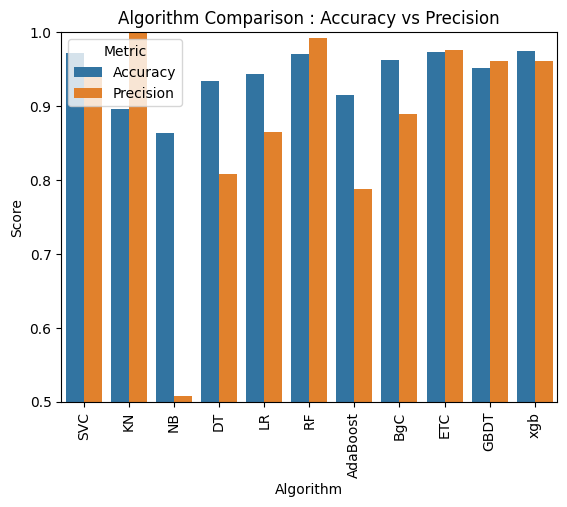

In [54]:
plt.Figure(figsize=(10,8))
sns.barplot(clf_df_melted, x='Algorithm', y='Score', hue='Metric')
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Algorithm Comparison : Accuracy vs Precision")
plt.show()

Trying Voting Classifier : Boosting technique

In [55]:
# Ensemble of multiple perfomed algorithms
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rfc),
        ('xgb', xgb),
        ('SVC', svc)
    ],
)

train_classifier(voting_clf, X_train, Y_train, X_test, Y_test)

(0.9758220502901354, 1.0)

Final Best Model : Voting Classifier(accuracy = 0.975 and precision = 1.0)

In [56]:
joblib.dump(voting_clf, 'best_model.joblib')

['best_model.joblib']